Perry Fox 5/31/23

# Medical Data Visualizer
"In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations."

This notebook was created first and then adapted to the replit python file for unit testing and submission:
https://replit.com/@Pyrus277/boilerplate-medical-data-visualizer#test_module.py

### Data description: 
- Rows: Patients  
- Cols: Medical measurements  

### Purpose:
Explore the relationship between cardiac disease (denoted by the `cardio` feature), body measurements, blood markers, and lifestyle choices.

---

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


---

#### Tasks:
**Create a categorical chart**  
- Add an `overweight` column
- Normalize the data by making 0 always good, and 1 always bad
- Convert the data into long form and create a chart using seaborn's catplot(). This is the step where you emulate Figure_1.
**Clean the data**
- See notes in prompt
**Create a correlation matrix**
- Use seaborn's heatmap(). Mask the upper triangle. Emulate example Figure_2.

---

### Create a Categorical chart

Add an overweight column to the data.   
BMI = weight(kg) / height^2(m)  
BMI > 25 is overweight  
1 = overweight, 0 = Not overweight
  
In the data `weight` is already in kg.  `height` is in centimeters

In [19]:
bmi = df.weight / (df.height/100)**2
overweight = bmi.apply(lambda x: 1 if(x>25) else 0) 
overweight.head()

0    0
1    1
2    0
3    1
4    0
dtype: int64

In [20]:
df['overweight'] = overweight # add the new column
# keep target variable cardio, at the end:
df = df.reindex(columns = [col for col in df.columns if col != 'cardio'] + ['cardio'])

In [21]:
df.head() #data1

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,overweight,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Need to convert `cholesterol` and `gluc` in the same way:
1 --> 0 "Good"  
\>1 --> 1 "Bad"

Turns out `active` does not need similar converting.

In [22]:
df['cholesterol'] = df.cholesterol.apply(lambda x: 1 if(x > 1) else 0)
df['gluc'] = df.gluc.apply(lambda x: 1 if(x > 1) else 0)
#df['active'] = df.active.replace({0:1,1:0})

In [23]:
df.head() #data2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,overweight,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Create a long format df with only the categoric variables `active`, `alco`, `cholesterol`, `gluc`, `overweight`, `smoke`, and `cardio`:

In [24]:
chart_df = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'cardio']]

In [25]:
chart_df.head() #data3

,active,alco,cholesterol,gluc,overweight,smoke,cardio
0,1,0,0,0,0,0,0
1,1,0,1,0,1,0,1
2,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1
4,0,0,0,0,0,0,0


In [26]:
# use pd.melt to wide --> long (https://www.geeksforgeeks.org/python-pandas-melt/)
chart_df = pd.melt(chart_df, id_vars = ['cardio'], 
        value_vars=['active', 'alco', 'cholesterol', 'gluc', 
                    'overweight', 'smoke'])                  
chart_df.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


Create a chart that shows the **value counts** of the **categorical features** using sns.catplot().
Split data by `Cardio` so there's one chart for each cardio value

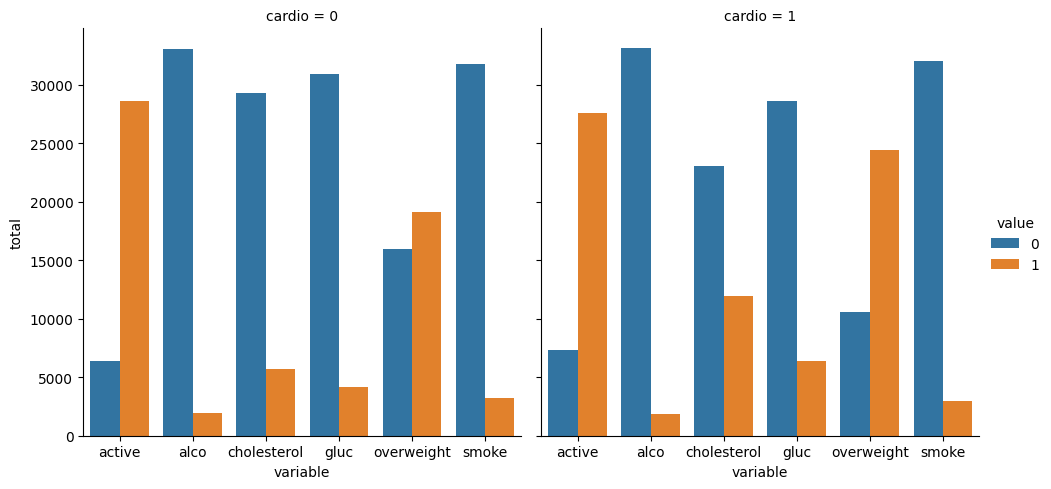

In [29]:
fig = sns.catplot(x='variable',
                  col='cardio',
                  hue='value',
                  kind='count',
                  data=chart_df)
fig = fig.set(ylabel='total').fig
# syntax correct, df appears wrong, we need the each variable to have a column

Done!

### Clean the data and make a correlation matrix

In [ ]:
df.head()

In [ ]:
df.shape

#### Cleaning
Filter out rows where diastolic pressure is higher than systolic:

In [ ]:
df_heat = df[df['ap_lo'] <= df['ap_hi']] # bool mask to identify correct rows

In [ ]:
df.shape # continued sanity checks

Filter out rows where height is less than the 2.5th percentile (so, height >= that percentile) and 
where height is more than the 97.5th percentile (so, height <= that percentile)

In [ ]:
# It makes sense to do these simultaneously since breaking out the steps will change the percentile spread
# after the first filter. But if you get an error, try breaking the steps out. OR investigate if this method
# isn't simultaneous enough!
df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025)) & 
                  (df_heat['height'] <= df_heat['height'].quantile(0.975)) ]

In [ ]:
df_heat.shape

Filter out rows where weight is less than the 2.5th percentile (so, weight >= that percentile and where height is more than the 97.5th percentile (so wight <= that percentile)

In [ ]:
df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
                  (df_heat['weight'] <= df_heat['weight'].quantile(0.975)) ]

In [ ]:
df_heat.shape

In [ ]:
df_heat.head()

#### Create a Correlation Matrix 
using `sns.heatmap()`

But first, some precise formatting so I don't get any validation errors when I move this over to replit:

In [ ]:
# change 'sex' to 'gender'
df_heat.rename(columns={'sex':'gender'}, inplace=True)
# swap col positions of 'overweight' and 'cardio'
df_heat = df_heat.iloc[:,list(range(0,12)) + [13, 12]]

In [ ]:
df_heat.head()

In [ ]:
# calculate a correlation matrix
corr = df_heat.corr()

# create a mask for the upper triangle
mask = np.triu(corr)

# visualize with a heatmap (mask argument = mask)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr.round(1),annot=True, mask=mask, vmin=-0.15, 
            vmax=0.3, center=0, linewidth=.03, 
            cbar_kws={"shrink": .5,"ticks": [-0.08, 0.00, 0.08, 0.16, 0.24]},
            )

-Some numbers are off by .1-- height:overweight, height:weight, ap_lo:colesterol, maybe a rounding thing, maybe it was an issue with the data cleaning.
-cbar is kinda off?

Try uploading!

Notes: 
- store the cleaned data in `df_heat`
- Calculate the correlation matrix and store in `corr`
- Generate a mask for the upper triangle and store in `mask`
- Setup the matplotlib figre and store like `fig, ax = ...`
- Draw the heatmap with `sns.heatmap()